In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [7]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [9]:
df = df.drop(['Car_Name','Owner'], axis = 1)

In [10]:
df['Buying_Price'] = df['Present_Price']

In [11]:
df['No_Of_Year'] = 2020 - df['Year']

In [12]:
df = df.drop(['Year','Present_Price'], axis = 1)

In [13]:
df.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Buying_Price,No_Of_Year
0,3.35,27000,Petrol,Dealer,Manual,5.59,6
1,4.75,43000,Diesel,Dealer,Manual,9.54,7
2,7.25,6900,Petrol,Dealer,Manual,9.85,3
3,2.85,5200,Petrol,Dealer,Manual,4.15,9
4,4.60,42450,Diesel,Dealer,Manual,6.87,6


In [14]:
new_df = pd.get_dummies(df, columns = ['Fuel_Type','Seller_Type','Transmission'], drop_first=True)

In [15]:
new_df.head()

,Selling_Price,Kms_Driven,Buying_Price,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,27000,5.59,6,0,1,0,1
1,4.75,43000,9.54,7,1,0,0,1
2,7.25,6900,9.85,3,0,1,0,1
3,2.85,5200,4.15,9,0,1,0,1
4,4.60,42450,6.87,6,1,0,0,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
new_df.columns

Index(['Selling_Price', 'Kms_Driven', 'Buying_Price', 'No_Of_Year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [18]:
X = new_df.drop('Selling_Price', axis = 1)

In [19]:
y = new_df['Selling_Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
my_model = LinearRegression()

In [23]:
my_model.fit(X_train, y_train)

LinearRegression()

In [24]:
prediction = my_model.predict(X_test)

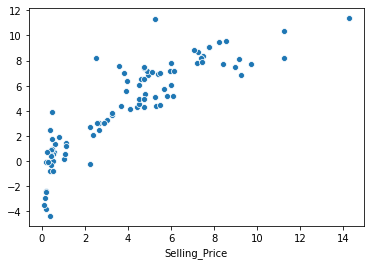

In [25]:
sns.scatterplot(y_test, prediction)

In [26]:
from sklearn.metrics import explained_variance_score

In [27]:
print(explained_variance_score(y_test, prediction))

0.6678885405128883


In [28]:
from sklearn.ensemble import ExtraTreesRegressor

In [29]:
my_model1 = ExtraTreesRegressor()

In [30]:
my_model1.fit(X_train, y_train)

ExtraTreesRegressor()

In [31]:
prediction = my_model1.predict(X_test)

In [32]:
from sklearn.metrics import explained_variance_score

In [33]:
print(explained_variance_score(y_test, prediction))

0.9558371464443367


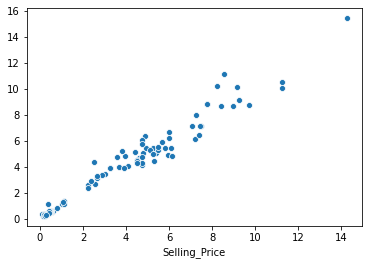

In [34]:
sns.scatterplot(y_test, prediction)

In [35]:
import pickle

In [36]:
pickle.dump(my_model1, open('car_price.pkl','wb'))